# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Classification Training and Predictions

In [1]:
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, \
precision_recall_curve, auc

from stepbystep.v0 import StepByStep
from plots.chapter3 import *

## Data Generation

In [2]:
X, y = make_moons(n_samples=100, noise=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=13)

In [3]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_val = sc.transform(X_val)

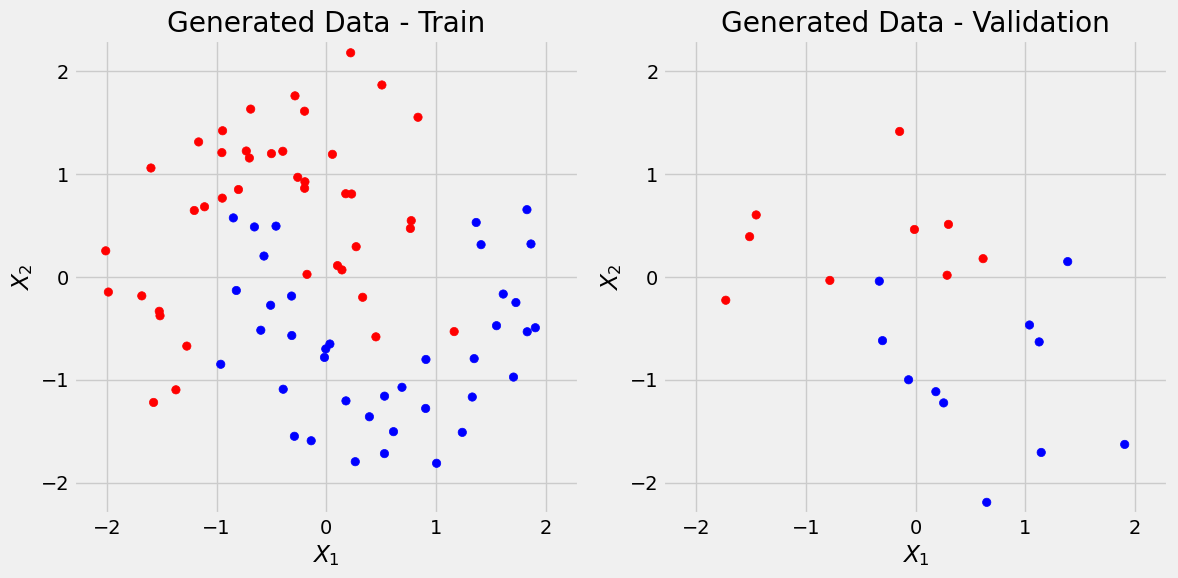

In [4]:
fig = figure1(X_train, y_train, X_val, y_val)

## Data Preparation

In [5]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=16)

## Model Configuration

In [6]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(2, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE with logits loss function
loss_fn = nn.BCEWithLogitsLoss()

## Model Training

In [7]:
n_epochs = 100

sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loaders(train_loader, val_loader)
sbs.train(n_epochs)

## Plotting Losses

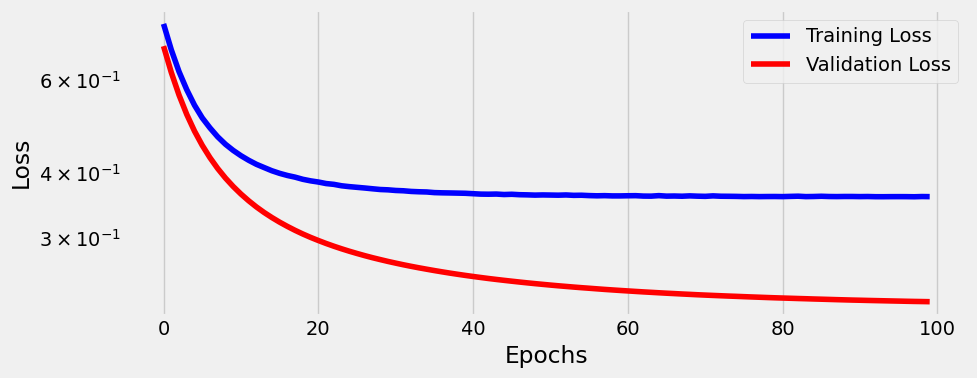

In [8]:
fig = sbs.plot_losses()

## Model Parameters

In [9]:
print(model.state_dict()) # remember, model == sbs.model

OrderedDict([('linear.weight', tensor([[ 1.1806, -1.8693]], device='cuda:0')), ('linear.bias', tensor([-0.0591], device='cuda:0'))])


## Making Predictions

### Making Predictions (Logits)

In [10]:
predictions = sbs.predict(x_train_tensor[:4])
predictions

array([[ 0.20345594],
       [ 2.9444456 ],
       [ 3.693318  ],
       [-1.2334074 ]], dtype=float32)

### Making Predictions (Probabilities)

In [11]:
probabilities = sigmoid(predictions)
probabilities

array([[0.5506892],
       [0.9500003],
       [0.9757152],
       [0.2255856]], dtype=float32)

### Making Predictions (Classes)

In [12]:
classes = (predictions >= 0).astype(int)
classes

array([[1],
       [1],
       [1],
       [0]])